# Lab N
### Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html

In [1]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle

# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

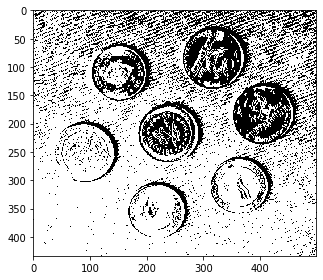

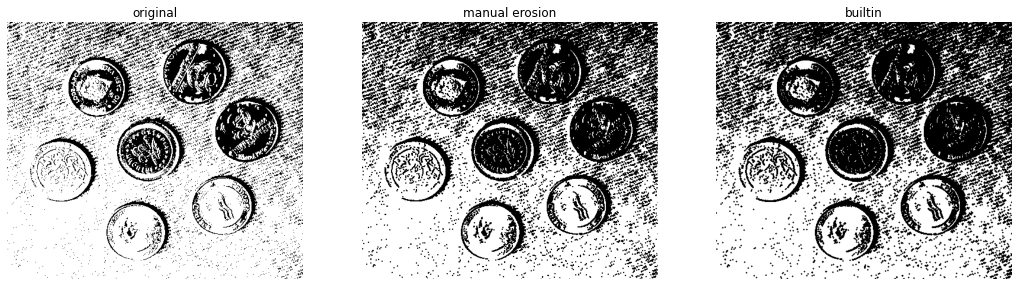

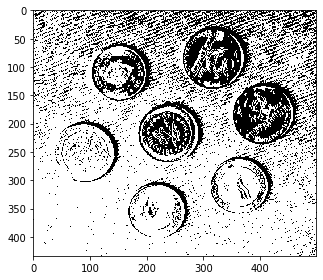

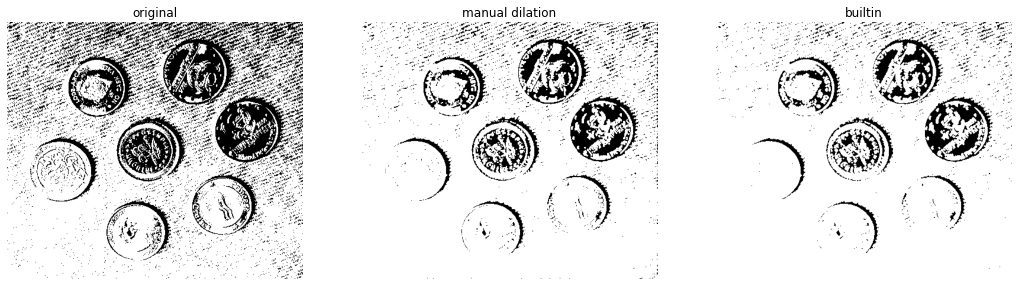

In [2]:
'''
1) Erosion / Dilation:
    - Load "coins.jpg" from the img folder
    - Convert the image to binary
    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image
    - Use Skimage's "binary_erosion" & "binary_dilation" & show the results
'''


def erosion(image, window_size):
    window = np.ones((window_size[0], window_size[1]), dtype=int)
    eroded_img = image[:, :]
    for i in range(image.shape[0] - window_size[0]):
        for j in range(image.shape[1] - window_size[1]):
            eroded_img[i, j] = np.all(np.logical_and(image[i:window_size[0] + i, j:window_size[1] + j], window))

    return eroded_img


def dilation(image, window_size): 
    window = np.ones((window_size[0], window_size[1]), dtype=int)
    dilated_img = image[:, :]
    for i in range(image.shape[0] - window_size[0]):
        for j in range(image.shape[1] - window_size[1]):
            dilated_img[i, j] = np.any(np.logical_and(image[i:window_size[0] + i, j:window_size[1] + j], window))

    return dilated_img

img = io.imread('img/coins.jpg')
img = rgb2gray(img)
img[img > 0.5] = 1
img[img <= 0.5] = 0
io.imshow(img)

eroded = erosion(img, (2, 2))

img = io.imread('img/coins.jpg')
img = rgb2gray(img)
img[img > 0.5] = 1
img[img <= 0.5] = 0
builtin_eroded = binary_erosion(img)

show_images([img, eroded, builtin_eroded], ['original', 'manual erosion', 'builtin'])



img = io.imread('img/coins.jpg')
img = rgb2gray(img)
img[img > 0.5] = 1
img[img <= 0.5] = 0
io.imshow(img)

dilated = dilation(img, (2, 2))

img = io.imread('img/coins.jpg')
img = rgb2gray(img)
img[img > 0.5] = 1
img[img <= 0.5] = 0
builtin_dilation = binary_dilation(img)

show_images([img, dilated, builtin_dilation], ['original', 'manual dilation', 'builtin'])




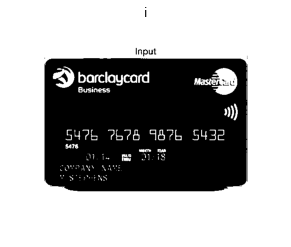

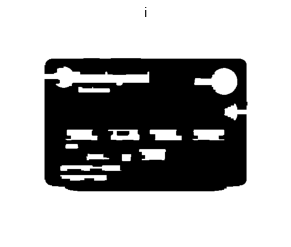

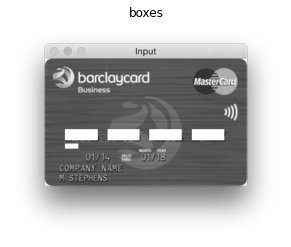

In [3]:
'''
2) Case Study: Credit Card Number Extraction
    - Load "card.jpg" from the img folder
    - Convert the image to binary by brightness thresholding maintaining the card number details for extraction
    - Use your erosion/dilation functions, or Skimage's functions only if you didn't implement them, to apply closing
        Note: The goal of this step is to join the card number into 4 sets of connected pixels
    - Use Skimage's "find_contours" to get the bounding boxes for the credit card's numbers by filtering on aspect ratio (between 2.5 & 3.5)
        Note: When using "find_contours(img, 0.8)" the o/p is a list of contours each having:
                - contour[:,0] being the Y values of the contour perimeter points
                - contour[:,1] being the X values of the contour perimeter points
'''

img = io.imread('img/card.jpg')
img = rgb2gray(img)
img[img > 0.6] = 1
img[img <= 0.6] = 0
show_images([img], 'img')

win_size = np.ones((7, 20), dtype=int)
resulted_img = binary_erosion(binary_dilation(img, footprint=win_size), footprint=win_size)
show_images([resulted_img], 'img')

contour = find_contours(resulted_img, 0.8)

bounding_boxes = []
for rect in contour:
    x_min = rect[:, 0].min()
    x_max = rect[:, 0].max()
    y_min = rect[:, 1].min()
    y_max = rect[:, 1].max()
    aspect_ratio = (y_max - y_min) / (x_max - x_min) 
    if 2.5 < aspect_ratio < 3.5:
        bounding_boxes.append([int(y_min), int(y_max), int(x_min), int(x_max)])

img_with_boxes = rgb2gray(io.imread('img/card.jpg'))

#When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
for box in bounding_boxes:
    [Xmin, Xmax, Ymin, Ymax] = box
  
    rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=img.shape)
    img_with_boxes[rr, cc] = 1 #set color white

show_images([img_with_boxes], ['boxes'])



In [4]:
'''
3) Skeletonization:
    - Load "horse.jpg" from the img folder 
    - Use a binary threshold of 0.9 to remove invisible noise in the background
    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it
'''


'\n3) Skeletonization:\n    - Load "horse.jpg" from the img folder \n    - Use a binary threshold of 0.9 to remove invisible noise in the background\n    - Use Skimage\'s "skeletonize(image)" to acquire the image\'s skeleton & show it\n    - Use Skimage\'s "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it\n'